#Primeiro Trabalho - Grafos e Redes Sociais

##1. Import de Bibliotecas

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [17]:
import pickle
m1 = pickle.load(open('MATRIZx9.pickle', 'rb'))
m2 = pickle.load(open('MATRIZ_B.pickle', 'rb'))
m3 = pickle.load(open('MATRIZ_C.pickle', 'rb'))

##2. Desenvolvimento do Trabalho

###2.1. Criando GridLine:

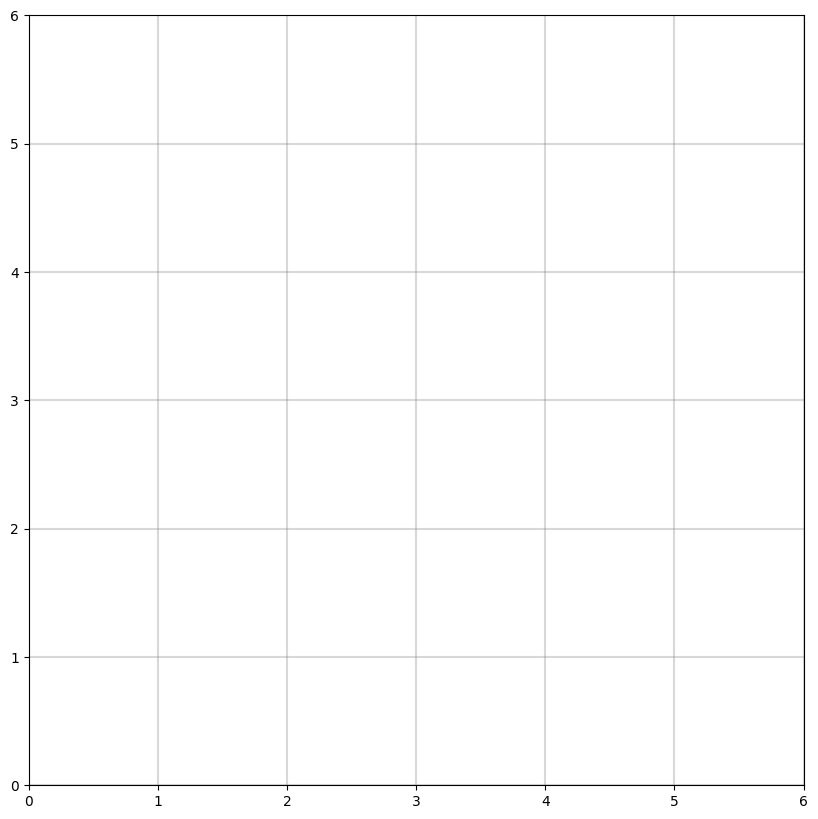

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))

n_rows = 6
n_cols = 6

for i in range(n_rows + 1):
    ax.axhline(y=i, color='gray', linestyle='-', alpha=0.3)
for j in range(n_cols + 1):
    ax.axvline(x=j, color='gray', linestyle='-', alpha=0.3)

ax.set_xlim(0, n_cols)
ax.set_ylim(0, n_rows)

#ax.set_xticks([])
#ax.set_yticks([])

plt.show()

###2.2. Setando Matriz

In [32]:
# Mapeamento de números para formas geométricas
numberToLetter = {1: 'C', 2: 'Q', 3: 'T'}

# Matriz de entrada
MATRIZ = m3

#   [
#     [2, 3, 1, 3, 1, 2],
#     [3, 3, 2, 1, 2, 3],
#     [1, 2, 3, 2, 3, 1],
#     [3, 1, 2, 2, 3, 3],
#     [1, 2, 3, 2, 3, 1],
#     [2, 3, 1, 1, 2, 3]
# ]

# Função para verificar se uma posição está dentro dos limites da matriz
def dentro_limites(x, y):
    return 0 <= x < len(MATRIZ[0]) and 0 <= y < len(MATRIZ)

###2.3. Plotando Tabela de Acordo com Matriz

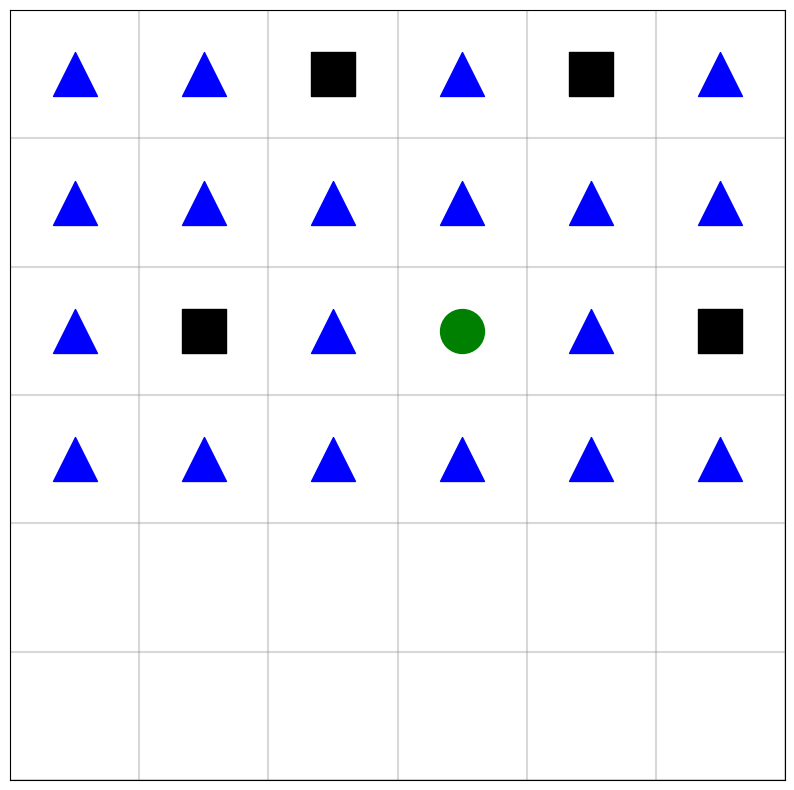

In [33]:
#Salva a pos e seta a forma
nodes = []
i = 0
posColuna = 0
for linha in MATRIZ:
  for coluna in linha:
    posLinha =  abs(i-5) # 0 = 5, 1= 4, 2=3, 3=2, 4=1, 5=0
    simbolo = MATRIZ[i][posColuna]
    simbolo = numberToLetter[simbolo]
    nodes.append((posColuna, posLinha, simbolo))
    posColuna += 1
  posColuna = 0
  i += 1

#Formata para o formato 05Q: (0,5)
pos = dict()
nodeNames = []
for i,j,s in nodes:
  node = str(i)+str(j)+str(s)
  nodeNames.append(node)
  pos[node] = (i,j)

#Criação de Grafo
GraphTest = nx.DiGraph()
GraphTest.add_nodes_from(nodeNames)

#Set das Formas
quadrados = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'Q']
circulos = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'C']
triangulos = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'T']
especial = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'E']

#Gridline
fig, ax = plt.subplots(figsize=(10, 10))

n_rows = 6
n_cols = 6

for i in range(n_rows + 1):
    ax.axhline(y=i, color='gray', linestyle='-', alpha=0.3)
for j in range(n_cols + 1):
    ax.axvline(x=j, color='gray', linestyle='-', alpha=0.3)

#Centraliza
pos = {}
for i,j,s in nodes:
    node = str(i)+str(j)+str(s)
    pos[node] = (i + 0.5, j + 0.5)

#Plota as formas
nx.draw_networkx_nodes(GraphTest, pos,
                      nodelist= quadrados,
                      node_color='black',
                      node_shape='s',
                      node_size=1000)
nx.draw_networkx_nodes(GraphTest, pos,
                      nodelist= triangulos,
                      node_color='blue',
                      node_shape='^',
                      node_size=1000)
nx.draw_networkx_nodes(GraphTest, pos,
                      nodelist= circulos,
                      node_color='green',
                      node_shape='o',
                      node_size=1000)

#Plota a Estrela por cima
#plt.scatter(pos['32Q'][0], pos['32Q'][1], color='yellow', marker='*', s=800, zorder=3)

#Seta
#nx.draw_networkx_edges(Graph, pos, edge_color='black', arrows=True, arrowsize=20)

#Definições
ax.set_xlim(0, n_cols)
ax.set_ylim(0, n_rows)
#ax.set_xticks([])
#ax.set_yticks([])
plt.show()

###2.4. Definição de Regras

Regras:

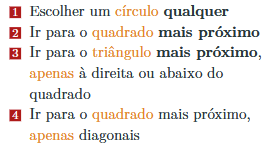

In [65]:
# Mapeamento de números para formas geométricas
numberToLetter = {1: 'C', 2: 'Q', 3: 'T'}

# Matriz de entrada
MATRIZ = m1

# Criação do grafo direcionado
GraphTestRules = nx.DiGraph()

In [66]:
# Regra 1: Encontrar todos os quadrados mais próximos (incluindo diagonais)
def encontrar_quadrados(circulo_x, circulo_y):
    quadrados_proximos = []
    dist_min = float('inf')

    for y in range(len(MATRIZ)):
        for x in range(len(MATRIZ[0])):
            if MATRIZ[y][x] == 2: # Quadrado
                dist = abs(circulo_x - x) + abs(circulo_y - y)
                if abs(circulo_x - x) == abs(circulo_y - y):
                  dist = dist/2
                if dist < dist_min:
                    dist_min = dist
                    quadrados_proximos = [(x, y)]
                elif dist == dist_min:
                    quadrados_proximos.append((x, y))

    return quadrados_proximos

# Regra 2: Encontrar o triângulo mais próximo à direita ou abaixo
def encontrar_triangulo(quadrado_x, quadrado_y):
    triangulo_mais_proximo = []
    dist_min = float('inf')

    for y in range(len(MATRIZ)):
        for x in range(len(MATRIZ[0])):
            if MATRIZ[y][x] == 3: # Triângulo
                if x >= quadrado_x and y >= quadrado_y: # Apenas direita ou abaixo
                    dist = abs(quadrado_x - x) + abs(quadrado_y - y)
                    if dist < dist_min:
                        dist_min = dist
                        triangulo_mais_proximo = [(x, y)]
                    elif dist == dist_min:
                        triangulo_mais_proximo.append((x, y))

    return triangulo_mais_proximo

# Regra 3: Encontrar o quadrado mais próximo nas diagonais
def encontrar_quadrado_diagonal(triangulo_x, triangulo_y):
    quadrados_diagonal = []
    x = 1
    max_dist = max(len(MATRIZ), len(MATRIZ[0]))

    while x < max_dist:
        for dx in [-x, x]:
            for dy in [-x, x]:
                x_diag = triangulo_x + dx
                y_diag = triangulo_y + dy
                if dentro_limites(x_diag, y_diag) and MATRIZ[y_diag][x_diag] == 2:
                    quadrados_diagonal.append((x_diag, y_diag))
        if quadrados_diagonal:
            break
        x += 1

    return quadrados_diagonal

# Adicionando nós e arestas ao grafo conforme as regras
estrela = []
nodes = []
for y in range(len(MATRIZ)):
    for x in range(len(MATRIZ[0])):
        forma_atual = MATRIZ[y][x]
        node_atual = f"{f'{x}x'}{f'{y}y'}{numberToLetter[forma_atual]}"
        GraphTestRules.add_node(node_atual)
        nodes.append((x, y))

        if forma_atual == 1: # Círculo (Regra 1)
            quadrados_posicoes = encontrar_quadrados(x,y)
            for qx,qy in quadrados_posicoes:
              print(f"Quadrado ({qx}, {qy})")
              node_quadrado=f"{f'{qx}x'}{f'{qy}y'}{numberToLetter[MATRIZ[qy][qx]]}"
              GraphTestRules.add_edge(node_atual,node_quadrado)

              # Regra Conectar o quadrado ao triângulo mais próximo à direita ou abaixo
              triangulo_pos=encontrar_triangulo(qx,qy)
              for tx,ty in triangulo_pos:
                print(f"Triângulo ({tx}, {ty})")
                node_triangulo=f"{f'{tx}x'}{f'{ty}y'}{numberToLetter[MATRIZ[ty][tx]]}"
                GraphTestRules.add_edge(node_quadrado,node_triangulo)

                # Regra conectar o triângulo ao quadrado mais próximo nas diagonais
                quadrado_diagonal_pos=encontrar_quadrado_diagonal(tx ,ty)
                for qdx,qdy in quadrado_diagonal_pos:
                  print(f"Quadrado Diagonal ({qdx}, {qdy})")
                  node_quadrado_diagonal=f"{f'{qdx}x'}{f'{qdy}y'}{numberToLetter[MATRIZ[qy][qx]]}"
                  GraphTestRules.add_edge(node_triangulo,node_quadrado_diagonal)
                  if node_quadrado_diagonal not in estrela:
                    estrela.append(f"{f'{qdx}x'}{f'{qdy}y'}{numberToLetter[MATRIZ[qy][qx]]}")

Quadrado (2, 1)
Triângulo (2, 2)
Quadrado Diagonal (3, 3)
Quadrado (5, 0)
Triângulo (5, 1)
Quadrado Diagonal (6, 0)
Quadrado (4, 1)
Triângulo (5, 1)
Quadrado Diagonal (6, 0)
Triângulo (4, 2)
Quadrado Diagonal (3, 3)
Quadrado (8, 1)
Triângulo (8, 2)
Quadrado Diagonal (9, 3)
Quadrado (11, 0)
Triângulo (11, 1)
Quadrado Diagonal (12, 0)
Quadrado (10, 1)
Triângulo (11, 1)
Quadrado Diagonal (12, 0)
Triângulo (10, 2)
Quadrado Diagonal (9, 3)
Quadrado (14, 1)
Triângulo (14, 2)
Quadrado Diagonal (15, 3)
Quadrado (17, 0)
Triângulo (17, 1)
Quadrado Diagonal (15, 3)
Quadrado (16, 1)
Triângulo (17, 1)
Quadrado Diagonal (15, 3)
Triângulo (16, 2)
Quadrado Diagonal (15, 3)
Quadrado (2, 1)
Triângulo (2, 2)
Quadrado Diagonal (3, 3)
Quadrado (4, 1)
Triângulo (5, 1)
Quadrado Diagonal (6, 0)
Triângulo (4, 2)
Quadrado Diagonal (3, 3)
Quadrado (3, 2)
Triângulo (4, 2)
Quadrado Diagonal (3, 3)
Quadrado (8, 1)
Triângulo (8, 2)
Quadrado Diagonal (9, 3)
Quadrado (10, 1)
Triângulo (11, 1)
Quadrado Diagonal (12, 0)

###2.5. Plotanto Setas de Acordo com Regras

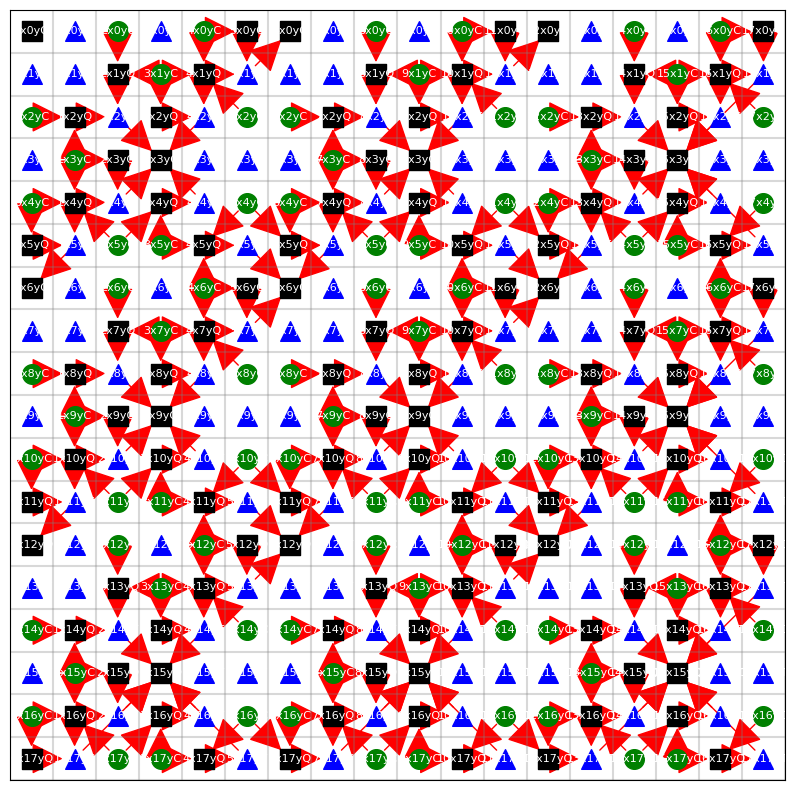

In [67]:
# Plotagem do grafo
#Gridline
fig, ax = plt.subplots(figsize=(10, 10))

n_rows = len(MATRIZ)
n_cols = len(MATRIZ[0])

for i in range(n_rows + 1):
    ax.axhline(y=i, color='gray', linestyle='-', alpha=0.3)
for j in range(n_cols + 1):
    ax.axvline(x=j, color='gray', linestyle='-', alpha=0.3)

# Centraliza os nós no centro das células da matriz (ajuste para visualização)
pos_adjusted = {
    f"{f'{x}x'}{f'{y}y'}{numberToLetter[MATRIZ[y][x]]}": (x + 0.5, n_rows - y - 0.5)
    for y in range(n_rows) for x in range(n_cols)
}

nx.draw_networkx_nodes(GraphTestRules,
                       pos_adjusted,
                       nodelist=[node for node in GraphTestRules.nodes if "Q" in node],
                       node_color='black',
                       node_shape='s',
                       node_size=200)
nx.draw_networkx_nodes(GraphTestRules,
                       pos_adjusted,
                       nodelist=[node for node in GraphTestRules.nodes if "T" in node],
                       node_color='blue',
                       node_shape='^',
                       node_size=200)
nx.draw_networkx_nodes(GraphTestRules,
                       pos_adjusted,
                       nodelist=[node for node in GraphTestRules.nodes if "C" in node],
                       node_color='green',
                       node_shape='o',
                       node_size=200)

# Plota as arestas (setas vermelhas entre os nós)
nx.draw_networkx_edges(GraphTestRules,
                       pos_adjusted,
                       edge_color='red',
                       arrows=True,
                       arrowsize=50)

# Adiciona rótulos aos nós (opcional)
nx.draw_networkx_labels(GraphTestRules,
                        pos_adjusted,
                        font_size=8,
                        font_color="white")

ax.set_xlim(0, n_cols)
ax.set_ylim(0, n_rows)
plt.show()

###2.6. Plot Final de Caminho com Estrela e Evitando Arestas Sobrepostas

(0.5, 17.5)
(1.5, 17.5)
(2.5, 17.5)
(3.5, 17.5)
(4.5, 17.5)
(5.5, 17.5)
(6.5, 17.5)
(7.5, 17.5)
(8.5, 17.5)
(9.5, 17.5)
(10.5, 17.5)
(11.5, 17.5)
(12.5, 17.5)
(13.5, 17.5)
(14.5, 17.5)
(15.5, 17.5)
(16.5, 17.5)
(17.5, 17.5)
(0.5, 16.5)
(1.5, 16.5)
(2.5, 16.5)
(3.5, 16.5)
(4.5, 16.5)
(5.5, 16.5)
(6.5, 16.5)
(7.5, 16.5)
(8.5, 16.5)
(9.5, 16.5)
(10.5, 16.5)
(11.5, 16.5)
(12.5, 16.5)
(13.5, 16.5)
(14.5, 16.5)
(15.5, 16.5)
(16.5, 16.5)
(17.5, 16.5)
(0.5, 15.5)
(1.5, 15.5)
(2.5, 15.5)
(3.5, 15.5)
(4.5, 15.5)
(5.5, 15.5)
(6.5, 15.5)
(7.5, 15.5)
(8.5, 15.5)
(9.5, 15.5)
(10.5, 15.5)
(11.5, 15.5)
(12.5, 15.5)
(13.5, 15.5)
(14.5, 15.5)
(15.5, 15.5)
(16.5, 15.5)
(17.5, 15.5)
(0.5, 14.5)
(1.5, 14.5)
(2.5, 14.5)
(3.5, 14.5)
(4.5, 14.5)
(5.5, 14.5)
(6.5, 14.5)
(7.5, 14.5)
(8.5, 14.5)
(9.5, 14.5)
(10.5, 14.5)
(11.5, 14.5)
(12.5, 14.5)
(13.5, 14.5)
(14.5, 14.5)
(15.5, 14.5)
(16.5, 14.5)
(17.5, 14.5)
(0.5, 13.5)
(1.5, 13.5)
(2.5, 13.5)
(3.5, 13.5)
(4.5, 13.5)
(5.5, 13.5)
(6.5, 13.5)
(7.5, 13.5)
(8.5, 13

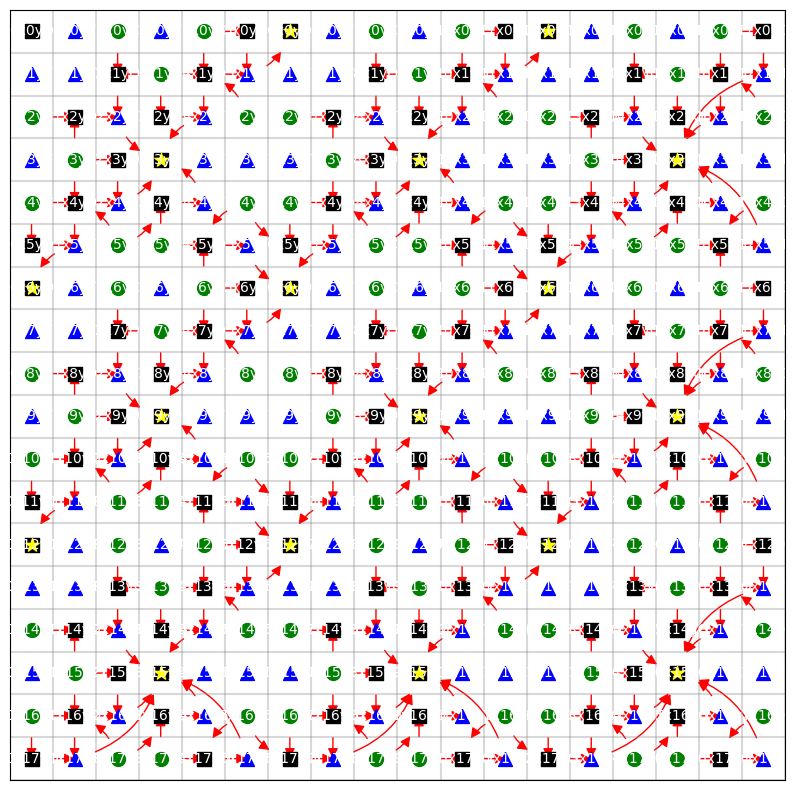

In [68]:
# Plotagem do grafo
#Gridline
fig, ax = plt.subplots(figsize=(10, 10))

n_rows = len(MATRIZ)
n_cols = len(MATRIZ[0])

for i in range(n_rows + 1):
    ax.axhline(y=i, color='gray', linestyle='-', alpha=0.3)
for j in range(n_cols + 1):
    ax.axvline(x=j, color='gray', linestyle='-', alpha=0.3)

# Centraliza os nós no centro das células da matriz (ajuste para visualização)
pos_adjusted = {
    f"{f'{x}x'}{f'{y}y'}{numberToLetter[MATRIZ[y][x]]}": (x + 0.5, n_rows - y - 0.5)
    for y in range(n_rows) for x in range(n_cols)
}

for y in range(n_rows):
   for x in range(n_cols):
    print(f"({x + 0.5}, {n_rows - y - 0.5})")


nx.draw_networkx_nodes(GraphTestRules,
                       pos_adjusted,
                       nodelist=[node for node in GraphTestRules.nodes if "Q" in node],
                       node_color='black',
                       node_shape='s',
                       node_size=100)
nx.draw_networkx_nodes(GraphTestRules,
                       pos_adjusted,
                       nodelist=[node for node in GraphTestRules.nodes if "T" in node],
                       node_color='blue',
                       node_shape='^',
                       node_size=100)
nx.draw_networkx_nodes(GraphTestRules,
                       pos_adjusted,
                       nodelist=[node for node in GraphTestRules.nodes if "C" in node],
                       node_color='green',
                       node_shape='o',
                       node_size=100)
nx.draw_networkx_nodes(GraphTestRules,
                       pos_adjusted,
                       nodelist=[node for node in estrela if "Q" in node],
                       node_color='yellow',
                       node_shape='*',
                       node_size=100)

# Calcular distâncias e criar estilos de conexão personalizados
edge_styles = {}
for u, v in GraphTestRules.edges():
    # Extrair coordenadas x e y dos nós
    # The node names are in the format 'XxYyZ', where X and Y are the coordinates and Z is the shape.
    # We need to extract the X and Y values, convert them to integers, and use them to calculate the distance.
    x1, y1 = int(u.split('x')[0]), int(u.split('x')[1].split('y')[0])  # Extract x1, y1 from u
    x2, y2 = int(v.split('x')[0]), int(v.split('x')[1].split('y')[0])  # Extract x2, y2 from v

    # Calcular distância de Manhattan
    dist = abs(x2 - x1) + abs(y2 - y1)

    # Definir rad com base na distância
    if dist >= 2:
        rad = 0.3  # Maior curvatura para arestas longas
    elif dist == 2:
        rad = 0.2  # Curvatura média para arestas médias
    else:
        rad = 0  # Curvatura padrão para arestas curtas

    edge_styles[(u, v)] = f"arc3,rad={rad}"

# Plota as arestas com estilos personalizados
for edge in GraphTestRules.edges():
    nx.draw_networkx_edges(GraphTestRules,
                          pos_adjusted,
                          edgelist=[edge],
                          edge_color='red',
                          arrows=True,
                          arrowsize=15,
                          connectionstyle=edge_styles[edge],
                          min_source_margin=10,
                          min_target_margin=10,
                          node_size=1000)


# Adiciona rótulos aos nós (opcional)
nx.draw_networkx_labels(GraphTestRules,
                        pos_adjusted,
                        font_size=10,
                        font_color="white")


ax.set_xlim(0, n_cols)
ax.set_ylim(0, n_rows)
plt.show()

In [69]:
pos_adjusted

{'0x0yQ': (0.5, 17.5),
 '1x0yT': (1.5, 17.5),
 '2x0yC': (2.5, 17.5),
 '3x0yT': (3.5, 17.5),
 '4x0yC': (4.5, 17.5),
 '5x0yQ': (5.5, 17.5),
 '6x0yQ': (6.5, 17.5),
 '7x0yT': (7.5, 17.5),
 '8x0yC': (8.5, 17.5),
 '9x0yT': (9.5, 17.5),
 '10x0yC': (10.5, 17.5),
 '11x0yQ': (11.5, 17.5),
 '12x0yQ': (12.5, 17.5),
 '13x0yT': (13.5, 17.5),
 '14x0yC': (14.5, 17.5),
 '15x0yT': (15.5, 17.5),
 '16x0yC': (16.5, 17.5),
 '17x0yQ': (17.5, 17.5),
 '0x1yT': (0.5, 16.5),
 '1x1yT': (1.5, 16.5),
 '2x1yQ': (2.5, 16.5),
 '3x1yC': (3.5, 16.5),
 '4x1yQ': (4.5, 16.5),
 '5x1yT': (5.5, 16.5),
 '6x1yT': (6.5, 16.5),
 '7x1yT': (7.5, 16.5),
 '8x1yQ': (8.5, 16.5),
 '9x1yC': (9.5, 16.5),
 '10x1yQ': (10.5, 16.5),
 '11x1yT': (11.5, 16.5),
 '12x1yT': (12.5, 16.5),
 '13x1yT': (13.5, 16.5),
 '14x1yQ': (14.5, 16.5),
 '15x1yC': (15.5, 16.5),
 '16x1yQ': (16.5, 16.5),
 '17x1yT': (17.5, 16.5),
 '0x2yC': (0.5, 15.5),
 '1x2yQ': (1.5, 15.5),
 '2x2yT': (2.5, 15.5),
 '3x2yQ': (3.5, 15.5),
 '4x2yT': (4.5, 15.5),
 '5x2yC': (5.5, 15.5),
 '

##3. Outro exemplo de matriz:

In [25]:
# Mapeamento de números para formas geométricas
numberToLetter = {1: 'C', 2: 'Q', 3: 'T'}

MATRIZ2 = [
    [2, 2, 1, 3, 1, 2, 3, 1, 2, 3],
    [3, 3, 2, 1, 2, 3, 1, 2, 3, 1],
    [1, 2, 3, 2, 3, 1, 2, 3, 1, 2],
    [3, 1, 2, 2, 3, 3, 1, 2, 3, 1],
    [1, 2, 3, 2, 3, 1, 2, 3, 1, 2],
    [2, 3, 1, 1, 2, 3, 1, 2, 3, 1],
    [3, 1, 2, 3, 1, 2, 3, 1, 2, 3],
    [1, 2, 3, 1, 2, 3, 1, 2, 3, 1],
    [2, 3, 1, 2, 3, 1, 2, 3, 1, 2],
    [3, 1, 2, 3, 1, 2, 3, 1, 2, 3]
]

# Criação do grafo direcionado
GraphTestRulesEx = nx.DiGraph()

# Função para verificar se uma posição está dentro dos limites da matriz
def dentro_limites(x, y):
    return 0 <= x < len(MATRIZ2[0]) and 0 <= y < len(MATRIZ2)

In [26]:
# Regra 1: Encontrar todos os quadrados mais próximos (incluindo diagonais)
def encontrar_quadrados(circulo_x, circulo_y):
    quadrados_proximos = []
    dist_min = float('inf')

    for y in range(len(MATRIZ2)):
        for x in range(len(MATRIZ2[0])):
            if MATRIZ2[y][x] == 2: # Quadrado
                dist = abs(circulo_x - x) + abs(circulo_y - y)
                if abs(circulo_x - x) == abs(circulo_y - y):
                  dist = dist/2
                if dist < dist_min:
                    dist_min = dist
                    quadrados_proximos = [(x, y)]
                elif dist == dist_min:
                    quadrados_proximos.append((x, y))

    return quadrados_proximos

# Regra 2: Encontrar o triângulo mais próximo à direita ou abaixo
def encontrar_triangulo(quadrado_x, quadrado_y):
    triangulo_mais_proximo = []
    dist_min = float('inf')

    for y in range(len(MATRIZ2)):
        for x in range(len(MATRIZ2[0])):
            if MATRIZ2[y][x] == 3: # Triângulo
                if x >= quadrado_x and y >= quadrado_y: # Apenas direita ou abaixo
                    dist = abs(quadrado_x - x) + abs(quadrado_y - y)
                    if dist < dist_min:
                        dist_min = dist
                        triangulo_mais_proximo = [(x, y)]
                    elif dist == dist_min:
                        triangulo_mais_proximo.append((x, y))

    return triangulo_mais_proximo

# Regra 3: Encontrar o quadrado mais próximo nas diagonais
def encontrar_quadrado_diagonal(triangulo_x, triangulo_y):
    quadrados_diagonal = []
    x = 1
    max_dist = max(len(MATRIZ2), len(MATRIZ2[0]))

    while x < max_dist:
        for dx in [-x, x]:
            for dy in [-x, x]:
                x_diag = triangulo_x + dx
                y_diag = triangulo_y + dy
                if dentro_limites(x_diag, y_diag) and MATRIZ2[y_diag][x_diag] == 2:
                    quadrados_diagonal.append((x_diag, y_diag))
        if quadrados_diagonal:
            break
        x += 1

    return quadrados_diagonal

# Adicionando nós e arestas ao grafo conforme as regras
estrela = []
nodes = []
for y in range(len(MATRIZ2)):
    for x in range(len(MATRIZ2[0])):
        forma_atual = MATRIZ2[y][x]
        node_atual = f"{x}{y}{numberToLetter[forma_atual]}"
        GraphTestRulesEx.add_node(node_atual)
        nodes.append((x, y))

        if forma_atual == 1: # Círculo (Regra 1)
            quadrados_posicoes = encontrar_quadrados(x,y)
            for qx,qy in quadrados_posicoes:
              print(f"Quadrado ({qx}, {qy})")
              node_quadrado=f"{qx}{qy}{numberToLetter[MATRIZ2[qy][qx]]}"
              GraphTestRulesEx.add_edge(node_atual,node_quadrado)

              # Regra Conectar o quadrado ao triângulo mais próximo à direita ou abaixo
              triangulo_pos=encontrar_triangulo(qx,qy)
              for tx,ty in triangulo_pos:
                print(f"Triângulo ({tx}, {ty})")
                node_triangulo=f"{tx}{ty}{numberToLetter[MATRIZ2[ty][tx]]}"
                GraphTestRulesEx.add_edge(node_quadrado,node_triangulo)

                # Regra conectar o triângulo ao quadrado mais próximo nas diagonais
                quadrado_diagonal_pos=encontrar_quadrado_diagonal(tx ,ty)
                for qdx,qdy in quadrado_diagonal_pos:
                  print(f"Quadrado Diagonal ({qdx}, {qdy})")
                  node_quadrado_diagonal=f"{qdx}{qdy}{numberToLetter[MATRIZ2[qy][qx]]}"
                  GraphTestRulesEx.add_edge(node_triangulo,node_quadrado_diagonal)
                  if node_quadrado_diagonal not in estrela:
                    estrela.append(f"{qdx}{qdy}{numberToLetter[MATRIZ2[qy][qx]]}")

Quadrado (1, 0)
Triângulo (1, 1)
Quadrado Diagonal (0, 0)
Quadrado (2, 1)
Triângulo (2, 2)
Quadrado Diagonal (3, 3)
Quadrado (5, 0)
Triângulo (6, 0)
Quadrado Diagonal (7, 1)
Triângulo (5, 1)
Quadrado Diagonal (6, 2)
Quadrado (4, 1)
Triângulo (5, 1)
Quadrado Diagonal (6, 2)
Triângulo (4, 2)
Quadrado Diagonal (3, 3)
Quadrado (8, 0)
Triângulo (9, 0)
Quadrado Diagonal (4, 5)
Triângulo (8, 1)
Quadrado Diagonal (9, 2)
Quadrado (7, 1)
Triângulo (8, 1)
Quadrado Diagonal (9, 2)
Triângulo (7, 2)
Quadrado Diagonal (5, 0)
Quadrado Diagonal (9, 4)
Quadrado (2, 1)
Triângulo (2, 2)
Quadrado Diagonal (3, 3)
Quadrado (4, 1)
Triângulo (5, 1)
Quadrado Diagonal (6, 2)
Triângulo (4, 2)
Quadrado Diagonal (3, 3)
Quadrado (3, 2)
Triângulo (4, 2)
Quadrado Diagonal (3, 3)
Quadrado (5, 0)
Triângulo (6, 0)
Quadrado Diagonal (7, 1)
Triângulo (5, 1)
Quadrado Diagonal (6, 2)
Quadrado (7, 1)
Triângulo (8, 1)
Quadrado Diagonal (9, 2)
Triângulo (7, 2)
Quadrado Diagonal (5, 0)
Quadrado Diagonal (9, 4)
Quadrado (6, 2)
Tr

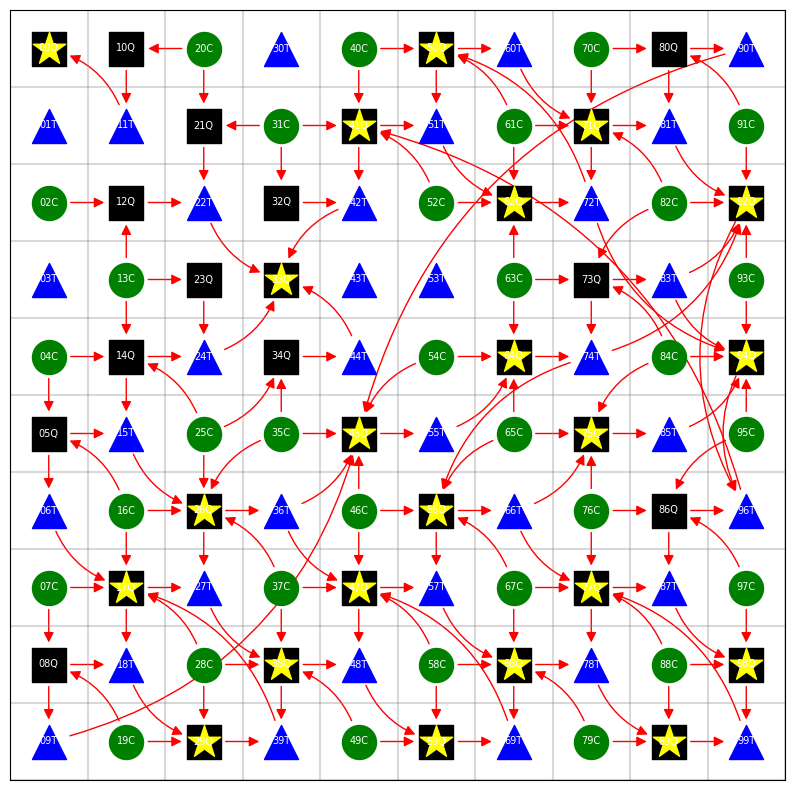

In [27]:
# Plotagem do grafo
#Gridline
fig, ax = plt.subplots(figsize=(10, 10))

n_rows = len(MATRIZ2)
n_cols = len(MATRIZ2[0])

for i in range(n_rows + 1):
    ax.axhline(y=i, color='gray', linestyle='-', alpha=0.3)
for j in range(n_cols + 1):
    ax.axvline(x=j, color='gray', linestyle='-', alpha=0.3)

# Centraliza os nós no centro das células da matriz (ajuste para visualização)
pos_adjusted = {
    f"{x}{y}{numberToLetter[MATRIZ2[y][x]]}": (x + 0.5, n_rows - y - 0.5)
    for y in range(n_rows) for x in range(n_cols)
}


nx.draw_networkx_nodes(GraphTestRulesEx,
                       pos_adjusted,
                       nodelist=[node for node in GraphTestRulesEx.nodes if "Q" in node],
                       node_color='black',
                       node_shape='s',
                       node_size=600)
nx.draw_networkx_nodes(GraphTestRulesEx,
                       pos_adjusted,
                       nodelist=[node for node in GraphTestRulesEx.nodes if "T" in node],
                       node_color='blue',
                       node_shape='^',
                       node_size=600)
nx.draw_networkx_nodes(GraphTestRulesEx,
                       pos_adjusted,
                       nodelist=[node for node in GraphTestRulesEx.nodes if "C" in node],
                       node_color='green',
                       node_shape='o',
                       node_size=600)
nx.draw_networkx_nodes(GraphTestRulesEx,
                       pos_adjusted,
                       nodelist=[node for node in estrela if "Q" in node],
                       node_color='yellow',
                       node_shape='*',
                       node_size=600)

# Calcular distâncias e criar estilos de conexão personalizados
edge_styles = {}
for u, v in GraphTestRulesEx.edges():
    # Extrair coordenadas x e y dos nós
    x1, y1 = int(u[0]), int(u[1])
    x2, y2 = int(v[0]), int(v[1])

    # Calcular distância de Manhattan
    dist = abs(x2 - x1) + abs(y2 - y1)

    # Definir rad com base na distância
    if dist >= 2:
        rad = 0.3  # Maior curvatura para arestas longas
    elif dist == 2:
        rad = 0.2  # Curvatura média para arestas médias
    else:
        rad = 0  # Curvatura padrão para arestas curtas

    edge_styles[(u, v)] = f"arc3,rad={rad}"

# Plota as arestas com estilos personalizados
for edge in GraphTestRulesEx.edges():
    nx.draw_networkx_edges(GraphTestRulesEx,
                          pos_adjusted,
                          edgelist=[edge],
                          edge_color='red',
                          arrows=True,
                          arrowsize=15,
                          connectionstyle=edge_styles[edge],
                          min_source_margin=15,
                          min_target_margin=15,
                          node_size=1000)


# Adiciona rótulos aos nós (opcional)
nx.draw_networkx_labels(GraphTestRulesEx,
                        pos_adjusted,
                        font_size=7,
                        font_color="white")


ax.set_xlim(0, n_cols)
ax.set_ylim(0, n_rows)
plt.show()